## Supervised Learning
`Type of machine learning where a model learns from labeled data. `<br>
`The algorithm is trained using input-output pairs (features and their corresponding correct labels) to predict outcomes for unseen data.`<br>
`It's like teaching a child with examples and feedback until they can generalize to new situations.`
```
Dataset + Learning Algorithm -> Predictive Model

```
The result of running the learning algorithm on the dataset is a predictive model that <b>maps inputs to targets</b>. <br>
For instance, it <b>can predict targets on new inputs</b>.

## Predicting Diabetes Risk
<b>Dataset:</b> UCI Diabetes Dataset  (a toy dataset)   -->   real datas!<br>

In [119]:
import numpy as np
import pandas as pd
from sklearn import datasets

# UCI Diabetes Dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)   # returns Tuple !!!
# diabetes_X : independent variables (features)     -->  DataFrame (Pandas)
# diabetes_y : dependent variable (target)      -->  Series (Pandas)

# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25
# Re-scaling the BMI feature to make the values more interpretable by multiplying by 30 and adding 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


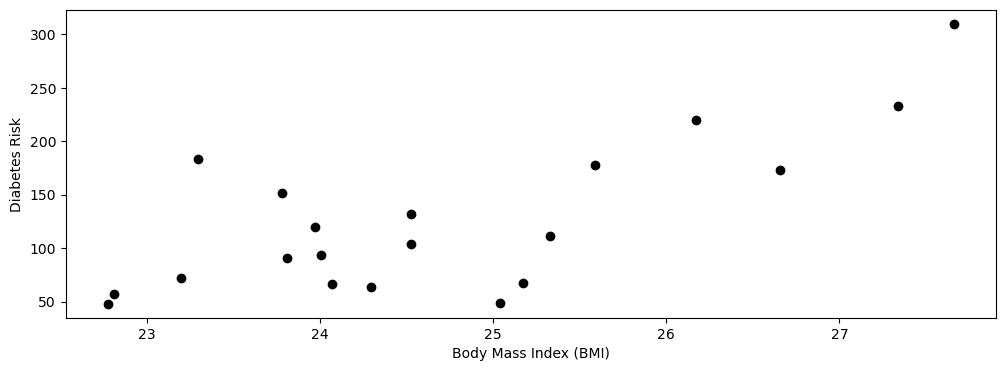

In [107]:
# %matplotlib inline: all Matplotlib plots are displayed directly within the notebook.
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.show()

## Superviser Learning Algorithm
Supervised Learning Algorithm has two components: <b>a model class</b> & <b>an optimizer</b>
### Model Class
Let’s assume in this example that risk is a linear function of BMI. <br>
```
y = theta1⋅x + theta0

x: BMI   (independent variable)
y: Diabetes risk   (dependent variable)

```
`theta1 and theta0 are the slope and the intercept of the line relates x to y`<br><br>
We can visualize this for a few values of theta1, theta2

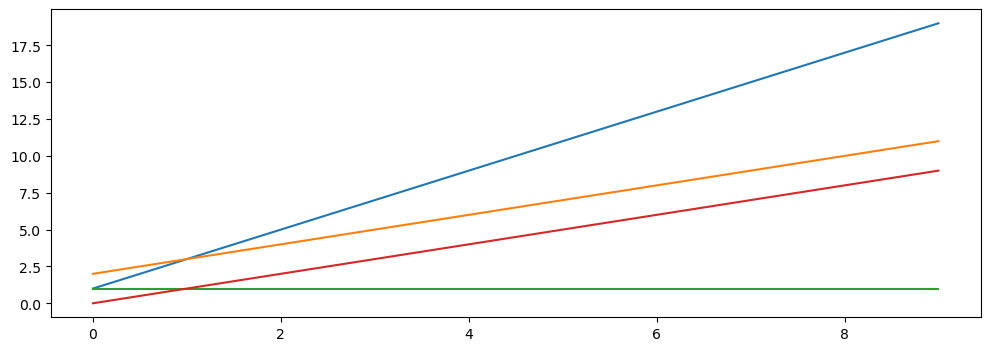

In [101]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y)
plt.show()

#### Our supervised learning algorithm will attempt to choose the linear relationship fits the training data well.
### Model Class
The goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.<br>
This is an optimization problem—we want to maximize the fit between <ins>the model and the data</ins> over the space of all possible models.<br>
 The component of a supervised learning algorithm that <ins>performs this search procedure is called the optimizer</ins>.

In [104]:
# LINEAR REGRESSION

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets      .values --> Pandas Series to NumPy Array
regr.fit(diabetes_X_train, diabetes_y_train.values)    # fit target paramater should be NumPy Array

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): \t', regr.coef_[0])          # slope of the model
print('Intercept (theta0): \t', regr.intercept_)    # intercept of the model 

Slope (theta1): 	 37.37884216052121
Intercept (theta0): 	 -797.0817390343262


#### 1. **Slope (`regr.coef_`)**
- Represents the **rate of change** between the independent variable (feature) and the dependent variable (target).  x and y
- For example, if the slope is `2.5`, it means that for every 1-unit increase in the independent variable, the dependent variable increases by an average of 2.5 units.
- **Positive slope**: As the feature increases, the target also increases.  
- **Negative slope**: As the feature increases, the target decreases.

#### 2. **Intercept (`regr.intercept_`)**
- Represents the **predicted value** of the dependent variable when the independent variable is zero.
- For example, if the intercept is `10`, it means that when the independent variable is 0, the target's predicted value is 10.

#### Summary
- **Slope**: Describes the speed and direction of change.
- **Intercept**: Represents the starting value of the model.

<br>
We used scikit-learn to find the best slope and intercept to the above dataset.<br>
We can visualize the linear model that best fits our data:

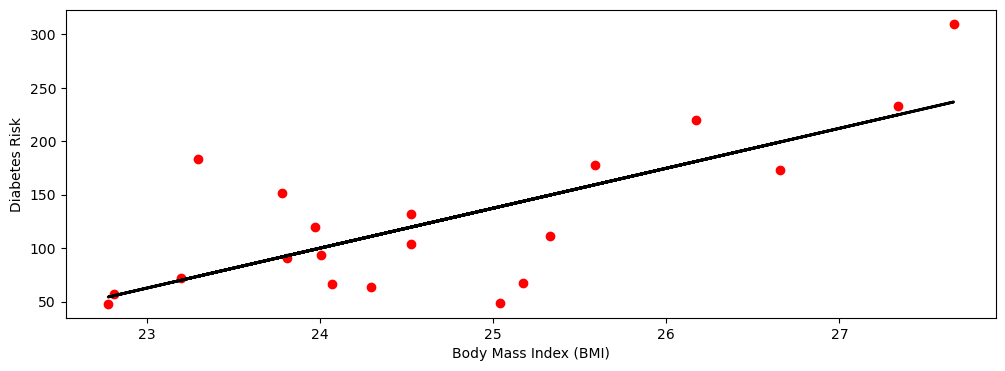

In [89]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train, color='red')    # red dots = dataset
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)  # black line = model
# The predicted linear regression line is drawn in black. The slope and intercept of the line are calculated
# based on the model parameters (regr.coef_ and regr.intercept_).
plt.show()

`Our visualization seems reasonable: we see that the linear model that we found is close to the observed data`

### Predictions

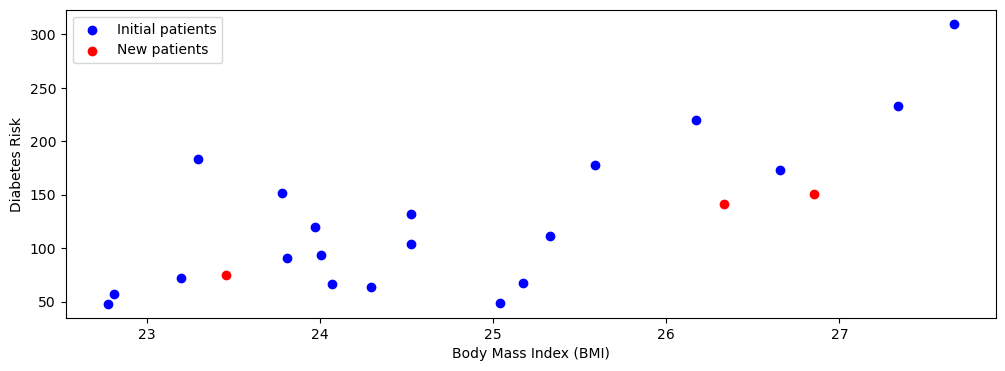

In [121]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train, color='blue')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])
plt.show()

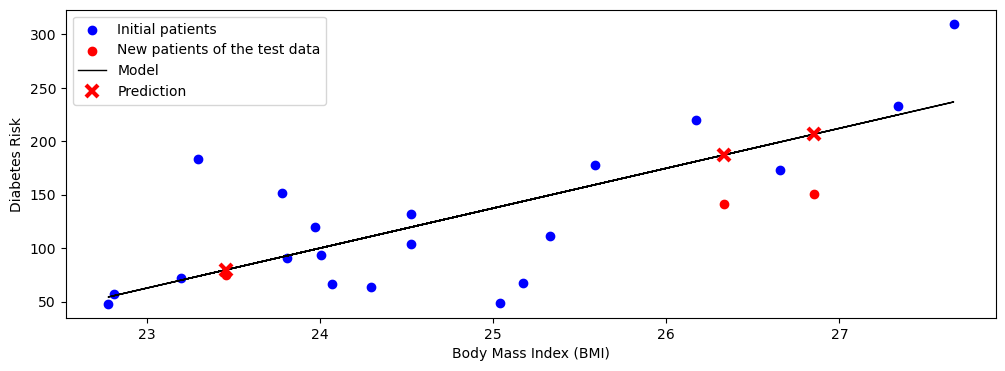

In [156]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train, color='blue')   # training data.
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')  # actual values of the test data.
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)  # linear regression model (relationship between BMI and diabetes risk.)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8) # predicted values of the test data by the model.
plt.legend(['Initial patients','New patients of the test data','Model', 'Prediction'])
plt.show()

### Supervised Learning and Its Applications

Supervised learning is a tool used in various tasks. Examples include:

- **Predictive modeling:** As more data is gathered, such as a patient's age, gender, and medical history, the model can outperform even human experts.

- **Understanding the impact of input variables on targets:** By examining the model, we can infer, for example, that a higher BMI tends to increase the risk of diabetes.

- **Applications:** Supervised learning is used in many areas, such as classifying medical images, translating languages, and detecting objects in self-driving cars.


# Using All Features

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR) # Description of Dataset
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# print(type(diabetes_X))    diabetes_X  -->  DataFrame (pandas)
# print(type(diabetes_y))    diabetes_y  -->  Series (pandas)

# Print part of the dataset with target variables
dataWithTargets = pd.concat([diabetes_X, diabetes_y], axis = 1). head()   # concat([DataFrame,Series], axis)
dataWithTargets


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


#### Unusual values
- Note that some numbers are unusual (e.g., age is negative). This is because scikit-learn normalized this data to have mean zero and standard deviation one.
- Each row i contains the vector Xi<br><br>
X is a d-dimensional vector :<br><br>
<img src="images//input.png" width=20% />

In [18]:
dataWithTargets.iloc[0]

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019907
s6         -0.017646
target    151.000000
Name: 0, dtype: float64

column vector<br>
In other applications of machine learning, a vector of attributes X could be comprised of <ins>all the pixel values of an image</ins> or it could contain <ins>indicator variables for whether certain words are present</ins> or absent in an input sentence.

In [39]:
# Create an 'old man' feature. (old and a man)
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,False


### Features: Discrete vs. Continuous
Features can be either discrete or continuous. We will see that some ML algorithms handle these differently.<br>
The BMI feature that we have seen earlier is an example of a continuous feature.

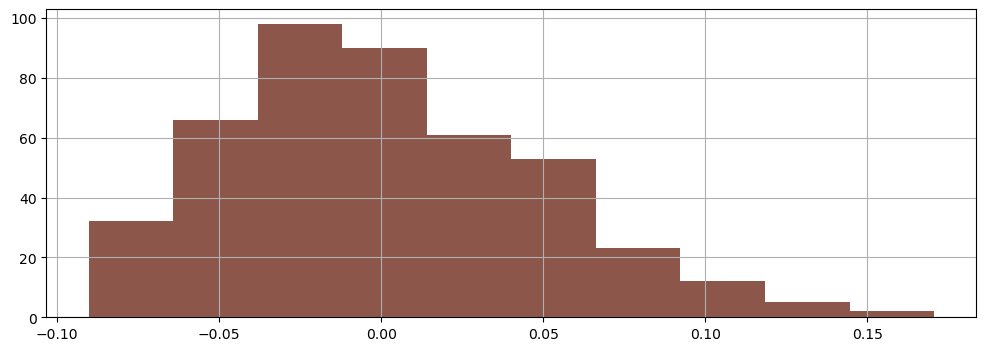

In [56]:
diabetes_X.loc[:, 'bmi'].hist()
# (:) means that you are selecting all rows.
# 'bmi' specific column you're selecting.
plt.show()

[ 0.05068012 -0.04464164]


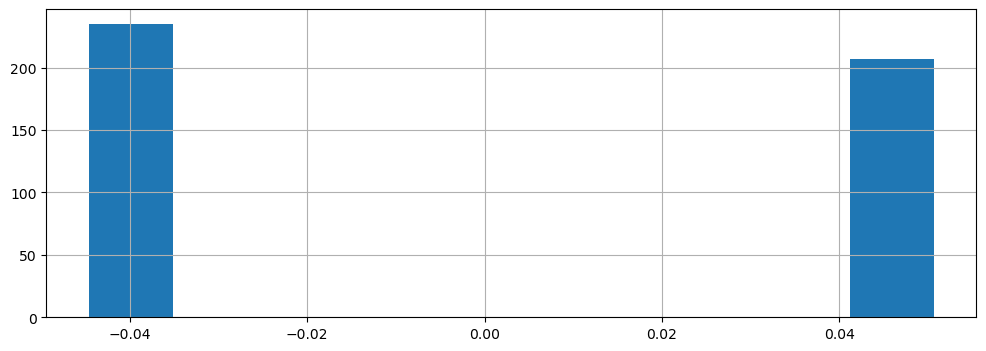

In [60]:
# DISCRETE VALUES : sex
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()
plt.show()

### Targets

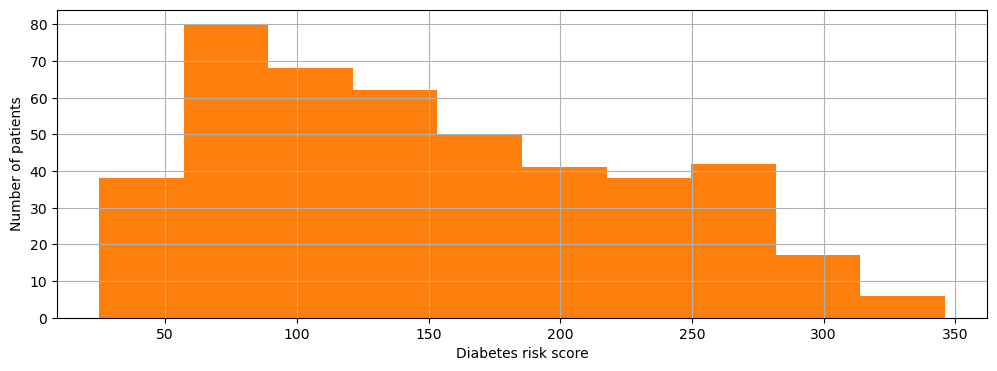

In [65]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()
plt.show()

### Targets: Regression vs Classification
We distinguish between two types of supervised learning problems, depending on the form of the target variable:
- <b><ins>Regression</ins>:</b> The target variable <ins>y is continuous</ins>. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
- <b><ins>Classification</ins>:</b> The target variable <ins>y is discrete </ins>. Each discrete value corresponds to a class and we are looking for a hyperplane that separates the different classes.


### The Feature Matrix
<img src="images//feature_matrix.png" width=60% />

### Three Components of a Supervised Machine Learning Algorithm
- A <b>model class</b>: the set of possible models we consider.
- An <b>objective function</b>, which defines how good a model is.
- An <b>optimizer</b>, which finds the best predictive model in the model class according to the objective function

In [93]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

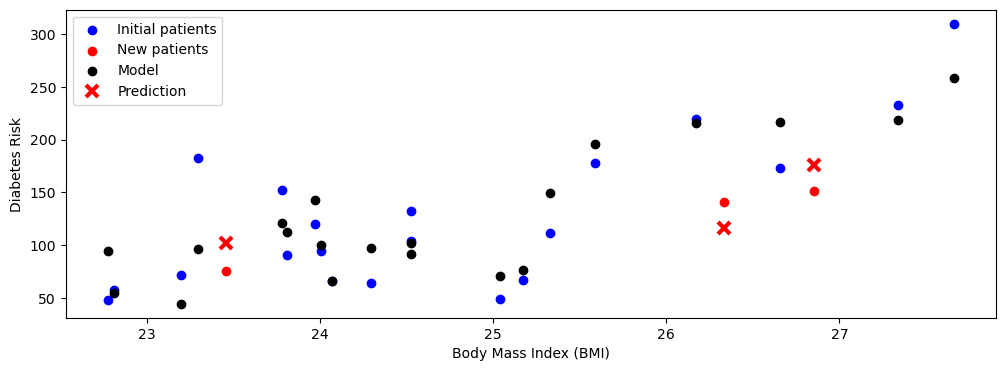

In [130]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train, color='blue')  # train data set  (initial patients)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')  # test data set (new patients)
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)  #  model all train predictions
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8) # model test predictions
plt.legend(['Initial patients','New patients','Model', 'Prediction' ])
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1118.18
Test set mean squared error: 668.02
Test set mean squared error on random inputs: 16000.15


```
diabetes risk grows as the patient’s BMI increases.
```